<font size=6 color=#A52A2A >Image Generation with Autoencoders, Variational Autoencoders, or GANs

<font size=5>Image Generation with Autoencoders, Variational Autoencoders, or GANs

Submission: Put the data and Jupyter notebook files in a folder. Make sure all links to data are relative to the folder so the notebooks can be run.
Find an image dataset other than MNIST or CIFAR. The image dataset must be pre-approved by the TA. It also cannot be the same image dataset as another student in the class unless it is TMINST.
 TMNIST. For TMNIST-Alphabet (94 characters and over 281,000 images) see https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters
 (Links to an external site.)
https://github.com/aiskunks/AI_Research/tree/main/dc-gan-best-practicesLinks to an external site.

<font size=5>Autoencoder
  

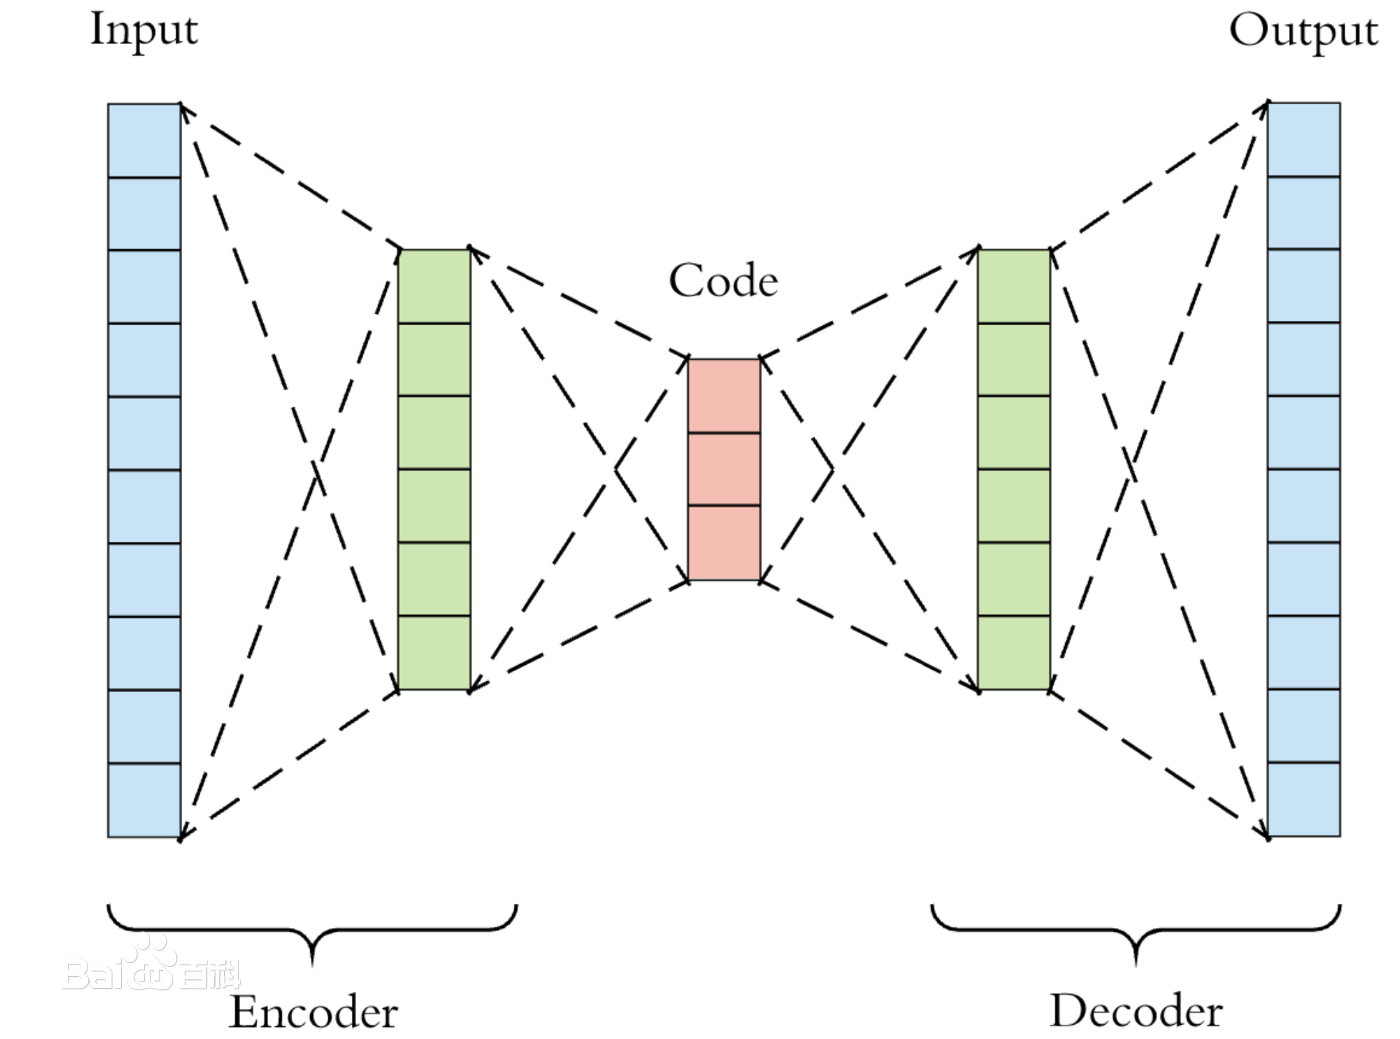

  Autoencoder (autoencoder, AE) is a type of artificial neural network (Artificial Neural Networks, ANNs) used in semi-supervised learning and unsupervised learning. Its function is to learn the representation of the input information by taking the input information as the learning target. (representation learning).
    
The self-encoder consists of two parts: encoder (encoder) and decoder (decoder). According to the learning paradigm, autoencoders can be divided into contractive autoencoders (contractive autoencoders), regularized autoencoders (regularized autoencoders) and variational autoencoders (Variational AutoEncoder, VAE), where the first two are discriminative models, and the latter The latter is a generative model. According to the type of construction, the autoencoder can be a neural network with a feedforward structure or a recurrent structure.
    
Autoencoders have the function of representing learning algorithms in a general sense, and are applied to dimensionality reduction and outlier detection (anomaly detection). Autoencoders that include convolutional layer construction can be applied to computer vision problems, including image denoising (image denoising), neural style transfer (neural style transfer), etc.

<font size=5>Variational Autoencoders

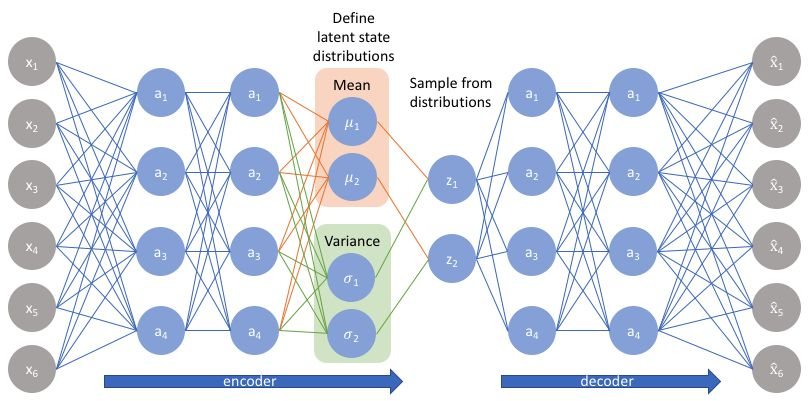

The traditional autoencoder model is mainly composed of two parts: encoder (encoder) and decoder (decoder).

Variational Auto-Encoders (VAE), as a form of deep generative model, is a generative network structure based on Variational Bayes (Variational Bayes, VB) inference proposed by Kingma et al. in 2014 . Different from the traditional autoencoder which describes the latent space numerically, it describes the observation of the latent space probabilistically, showing great application value in data generation. As soon as VAE was proposed, it quickly gained widespread attention in the field of deep generative models, and it is regarded as one of the most research-worthy methods in the field of unsupervised learning together with Generative Adversarial Networks (GAN). More and more applications.

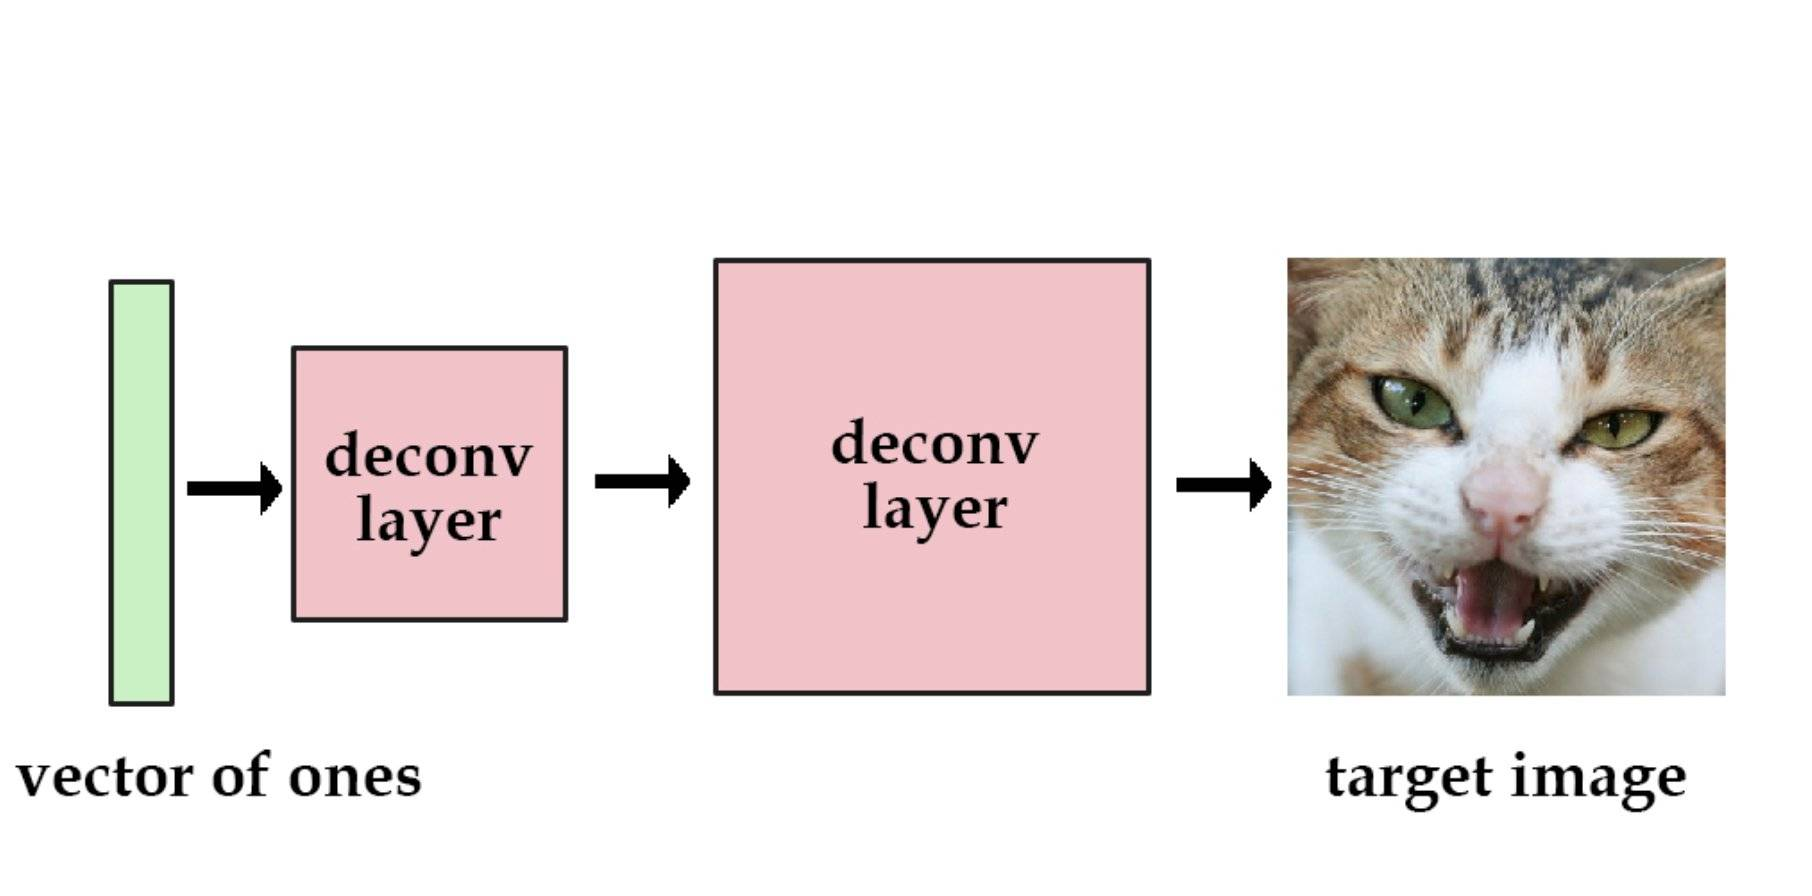

<font size=5>GANs
    
Generative Adversarial Networks (GANs) are a class of machine learning frameworks devised by Ian Goodfellow and colleagues in June 2014. Two neural networks compete against each other in the form of a zero-sum game, where one agent's gain is the other agent's loss.

Given a training set, the technique learns to generate new data with the same statistics as the training set. For example, a GAN trained on photos can generate new photos that appear realistic, at least to human observers, with many realistic features. Although GANs were originally proposed as a form of generative model for unsupervised learning, it turns out that GANs can also be used for semi-supervised learning, fully supervised learning, and reinforcement learning. 

The core idea of GANs is based on "indirect" training via a discriminator, which is another neural network that can judge how "real" an input looks, which itself is dynamically updated. [5] This means that the generator is not trained to minimize the distance to a specific image, but instead fools the discriminator. This enables the model to learn in an unsupervised manner.

GAN is similar to mimicry in evolutionary biology, an evolutionary arms race between two networks.

<font size=5>Install Environment

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from keras.models import Model
from keras.layers import *
from keras import backend as K

<font size=5>Read CSV file

In [5]:
# tmnist data
data = pd.read_csv('94_character_TMNIST.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font size=5>Show sample of Dataset

In [6]:
X = data.drop(columns={'names','labels'})
y = data[['labels']]

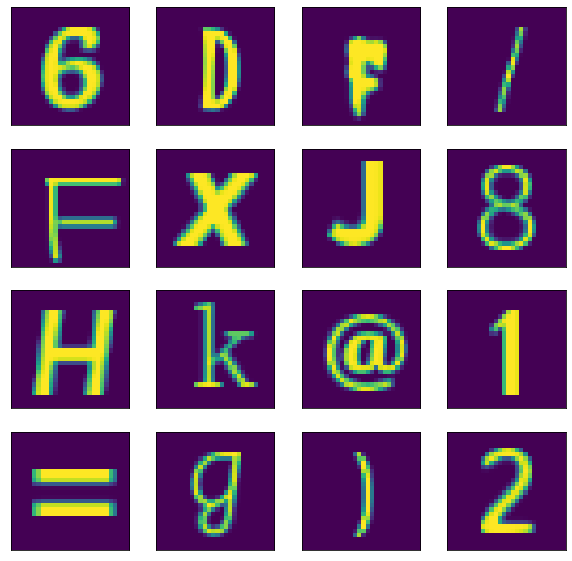

In [7]:
import matplotlib.pyplot as plt

X_images = X.values.reshape(-1,28,28)
fig,axs = plt.subplots(4,4,figsize=(10,10))
for i in range(16):
    r=i//4
    c=i%4
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()

<font size=5>Reshape Data

In [2]:
X = data.iloc[:, 2:786]
print(X.shape)

(274093, 784)


In [3]:
train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
X_train = X_train.values.astype('float32')/255.
X_test = X_test.values.astype('float32')/255.
output_X_train = X_train.reshape(-1,28,28,1)
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(219274, 784) (54819, 784)


<font size=5>Generative Architecture (60 Points)
    
Use a generative architecture (Autoencoders, GANs, VAEs, Diffusion Models)

In [4]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(32, activation = 'relu')(flat)

In [5]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 61s 36ms/step - loss: 0.1813
Epoch 2/10
1714/1714 [==============================] - 60s 35ms/step - loss: 0.1452
Epoch 3/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1500
Epoch 4/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1284
Epoch 5/10
1714/1714 [==============================] - 57s 34ms/step - loss: 0.1312
Epoch 6/10
1714/1714 [==============================] - 57s 33ms/step - loss: 0.1274
Epoch 7/10
1714/1714 [==============================] - 57s 34ms/step - loss: 0.1222
Epoch 8/10
1714/1714 [==============================] - 57s 33ms/step - loss: 0.1196
Epoch 9/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1210
Epoch 10/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1215


In [6]:
test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)

(54819, 28, 28, 1)


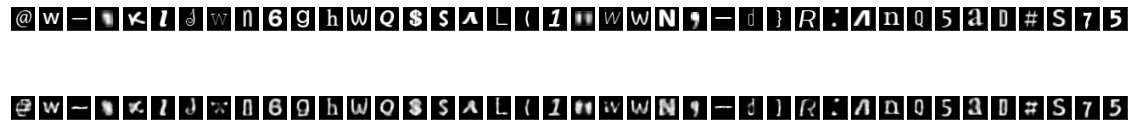

In [7]:
import matplotlib.pyplot as plt

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<font size=5>Create at least 40 fake images using ONE of the generative architectures. How well did it do?  

In the code below will show. We can see that the results can basically be judged as successful training. Although the image lacks some details, it can be recognized in general.

In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(64, activation = 'relu')(flat)

In [9]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 85s 49ms/step - loss: 0.1685
Epoch 2/10
1714/1714 [==============================] - 90s 52ms/step - loss: 0.1386
Epoch 3/10
1714/1714 [==============================] - 84s 49ms/step - loss: 0.1259
Epoch 4/10
1714/1714 [==============================] - 93s 54ms/step - loss: 0.1201
Epoch 5/10
1714/1714 [==============================] - 85s 49ms/step - loss: 0.1250
Epoch 6/10
1714/1714 [==============================] - 94s 55ms/step - loss: 0.1246
Epoch 7/10
1714/1714 [==============================] - 96s 56ms/step - loss: 0.1253
Epoch 8/10
1714/1714 [==============================] - 89s 52ms/step - loss: 0.1228
Epoch 9/10
1714/1714 [==============================] - 86s 50ms/step - loss: 0.1162
Epoch 10/10
1714/1714 [==============================] - 86s 50ms/step - loss: 0.1132


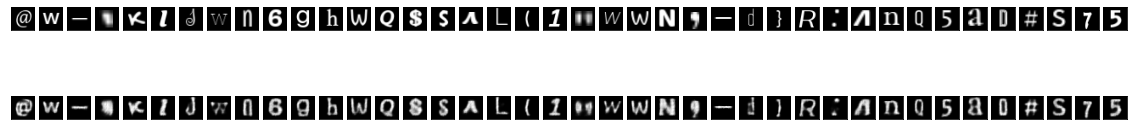

In [10]:
test_imgs = autoencoder.predict(output_X_test)

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<font size=5>Adjust the latent space size to 64. Change the network architecture.

In [11]:
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(64, activation = 'relu')(flat)

In [12]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(64, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 83s 48ms/step - loss: 0.1807
Epoch 2/10
1714/1714 [==============================] - 80s 47ms/step - loss: 0.1495
Epoch 3/10
1714/1714 [==============================] - 81s 47ms/step - loss: 0.1329
Epoch 4/10
1714/1714 [==============================] - 91s 53ms/step - loss: 0.1310
Epoch 5/10
1714/1714 [==============================] - 89s 52ms/step - loss: 0.1227
Epoch 6/10
1714/1714 [==============================] - 92s 53ms/step - loss: 0.1211
Epoch 7/10
1714/1714 [==============================] - 85s 50ms/step - loss: 0.1120
Epoch 8/10
1714/1714 [==============================] - 88s 51ms/step - loss: 0.1135
Epoch 9/10
1714/1714 [==============================] - 88s 51ms/step - loss: 0.1186
Epoch 10/10
1714/1714 [==============================] - 86s 50ms/step - loss: 0.1126


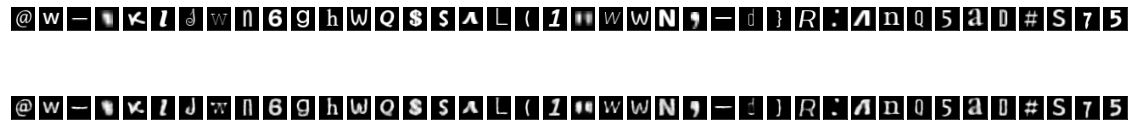

In [13]:
test_imgs = autoencoder.predict(output_X_test)

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<font size=5>What combination of network architecture and latent space size gives the best trade-off between compression and quality?
    
After adjusting the size of the latent space and changing the network architecture, I think the combination of latent space size 32 can achieve the best balance between compression and quality.


<font size=5 color=#A52A2A >References

[1]: AI_Research,dc-gan-best-practices. https://github.com/aiskunks/AI_Research/tree/main/dc-gan-best-practices

[2]: keras variational autoencoder generates pictures. https://blog.csdn.net/qq_35054151/article/details/116705777
    
[3]: Walking into Deep Generative Models: Variational Autoencoders (VAE) and Generative Adversarial Networks (GAN). https://cloud.tencent.com/developer/article/1096316
    
[4]: TMNIST Alphabet (94 characters). https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters
    
[5]: Understanding Variational Autoencoders (VAE) in one article, https://zhuanlan.zhihu.com/p/64485020
    
 
<font size=5 color=#A52A2A >Licensing
    
Copyright 2022 Yiqing Wang

Persons who have obtained a copy of the software and associated documentation files may use the software free of charge without restriction. Publish, distribute, sublicense and/or sell copies of the software, subject to the following conditions:

THIS SOFTWARE IS PROVIDED "AS IS" WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NON-INFRINGEMENT WARRANTIES. 
    
In no event shall the author or copyright holder be liable for any claim, damage or other liability, whether in contract, tort or otherwise, arising out of or in connection with the software or its use or other dealings. software.
